# Criação do Grafo
Através das bibliotecas networkx e pyplot para python, foi possível a criação do grafo por meio do Dataset criado anteriormente

In [17]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Na próxima célula, para a criação do grafo é necessário que o arquivo de entrada seja um arquivo csv com as seguintes colunas: **id_no**, **id_prox_no**, e **peso**, onde os IDs serão os vertices que conectarão de forma não direcionada com os IDs dos próximos nós e o peso será o peso da aresta.

In [18]:
df = pd.read_csv('youtube.csv')

ids_nos = df['id_no'].tolist()
ids_prox_no = df['id_prox_no'].tolist()
peso = pd.Series(df['peso'])
peso = np.around(peso*0.1, 2)
peso = peso.tolist()

E então, os nós serão adicionados através da função add_edge no grafo G, sendo ids_nos -> ids_prox_no, e o peso da aresta.

In [19]:
G = nx.Graph()
ids_nos[1]
for a in range(len(ids_prox_no)):
    G.add_edge(ids_nos[a], ids_prox_no[a], weight=peso[a])
    # print(ids_nos[a], "->", ids_prox_no[a],":", peso[a])

# print(G.nodes())

Por fim, para visualizar o grafo, através do método draw do NetworkX, e do pyplot, é possível plotar o grafo com os indices dos nós e os pesos de cada aresta, onde os pesos foram multiplicados por 0.1 para melhor visualização.

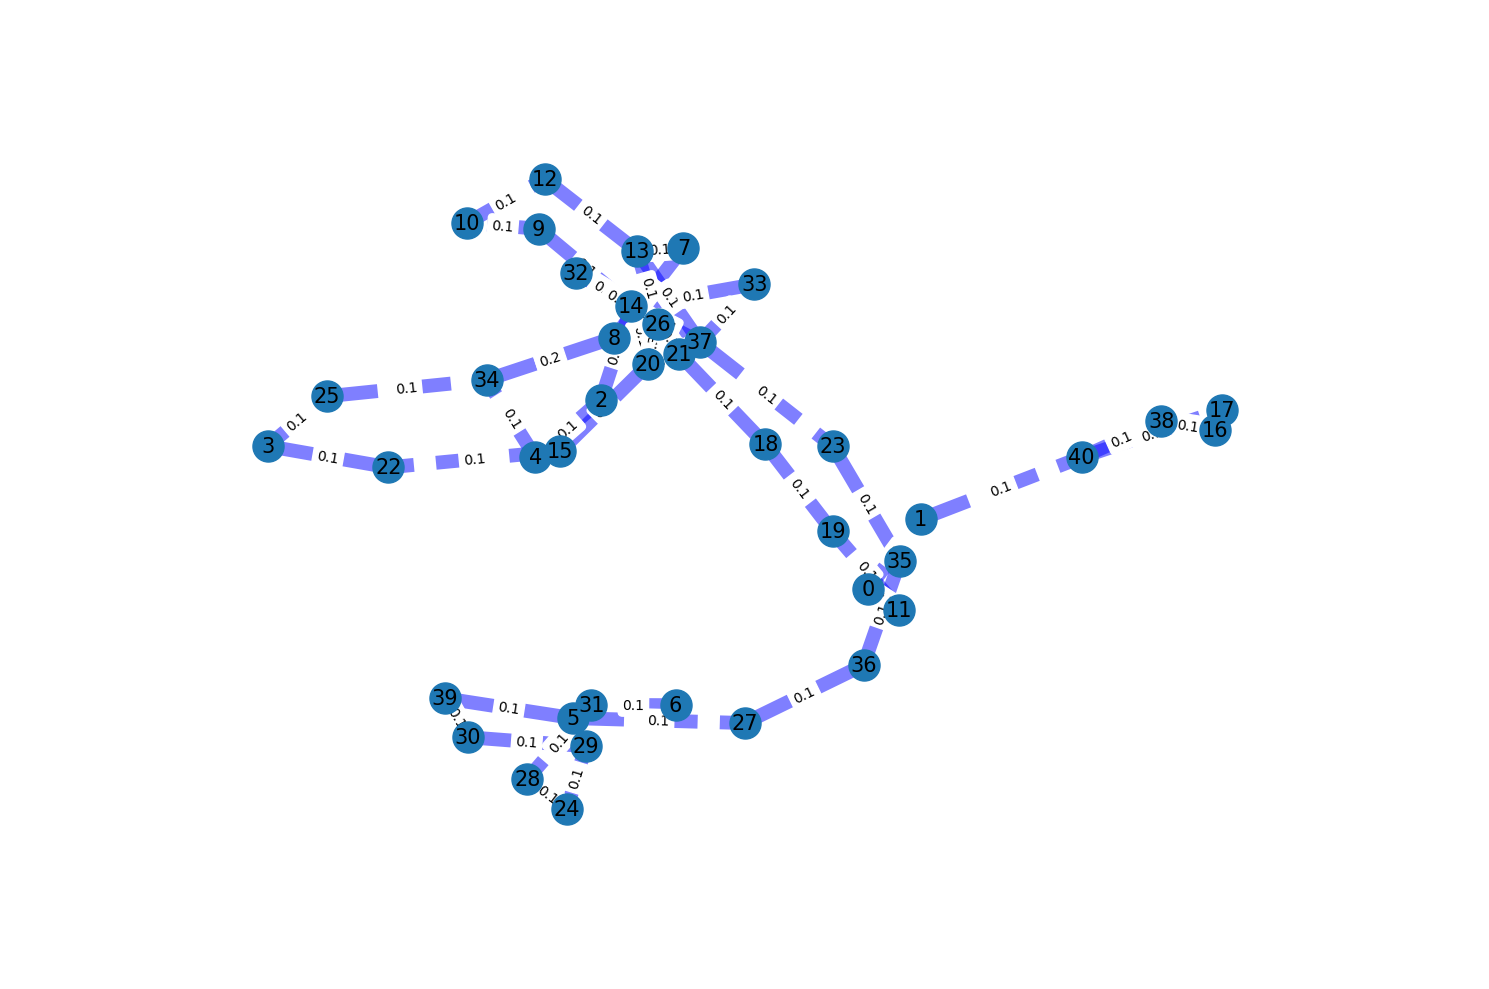

In [20]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

arestas = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.spring_layout(G, seed=4572321)


nx.draw_networkx_nodes(G, pos, node_size=500)

nx.draw_networkx_edges(
    G, pos, edgelist=arestas, width=10, alpha=0.5, edge_color="b", style="dashed"
)

nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


Para análise dos dados, foi calculado o grau de centralidade, de proximidade e de intermediação. 

O Grau de Centralidade, consiste no número de conexões diretamente conectadas em um vértice

Centralidade de Proximidade, é baseada na soma das distâncias de um vértice em relação aos demais vértices do grafo, ou seja, verifica o menor caminho de um vértice, para todos os outros vértices.

A centralidade de Intermediação quantifica o número de vezes que um nó age como ponte ao longo do caminho mais curto entre dois outros nós. 

In [27]:
from algoritmosCentralidade import * 
degreeCentrality = degree_centrality(G)
closenessCentrality = closeness_centrality(G)
betweennessCentrality = betweenness_centrality(G)

for id in df['id_no'].tolist():
    for i in degreeCentrality:
        if i == id: 
            df.loc[df['id_no'] == i, 'degree_centrality'] = degreeCentrality[i]
            df.loc[df['id_no'] == i, 'closeness_centrality'] = closenessCentrality[i]
            df.loc[df['id_no'] == i, 'betweenness_centrality'] = betweennessCentrality[i]



In [24]:
dfsorted = df.sort_values(by=['degree_centrality', 'closeness_centrality', 'betweenness_centrality'], ascending=False)
dfsorted.to_csv('youtube.csv',index=False)
dfsorted.head(5)

,id_no,id_prox_no,peso,titulo,proximo_video_titulo,visualizacoes,curtidas,canal,data,url,degree_centrality,closeness_centrality,betweenness_centrality
16,14,2,1,Felipe D'Avila (Novo) pergunta para Simone Teb...,Bolsonaro (PL) pergunta para Felipe D'Avila (N...,73782,1100.0,g1,30 de set. de 2022,https://www.youtube.com/watch?v=IO3EVo7z-xw,0.200,0.222222,0.189081
17,14,26,1,Felipe D'Avila (Novo) pergunta para Simone Teb...,Padre Kelmon (PTB) pergunta para Felipe D'Avil...,73782,1100.0,g1,30 de set. de 2022,https://www.youtube.com/watch?v=IO3EVo7z-xw,0.200,0.222222,0.189081
18,14,33,1,Felipe D'Avila (Novo) pergunta para Simone Teb...,Simone Tebet (MDB) pergunta para Lula (PT) sob...,73782,1100.0,g1,30 de set. de 2022,https://www.youtube.com/watch?v=IO3EVo7z-xw&t=3s,0.200,0.222222,0.189081
19,14,37,1,Felipe D'Avila (Novo) pergunta para Simone Teb...,Soraya Thronicke (Uniao Brasil) pergunta para ...,73782,1100.0,g1,30 de set. de 2022,https://www.youtube.com/watch?v=IO3EVo7z-xw,0.200,0.222222,0.189081
53,37,20,4,Soraya Thronicke (Uniao Brasil) pergunta para ...,Lula (PT) pergunta para Ciro Gomes (PDT) sobre...,423484,6000.0,g1,30 de set. de 2022,https://www.youtube.com/watch?v=0rlYVPffxXQ&t=2s,0.175,0.238095,0.485983


Para melhor visualização, é possível plotar os vértices com tamanho de acordo com o gráu de intermediação, vale ressaltar que o peso das arestas influencia na conexão entre os vértices

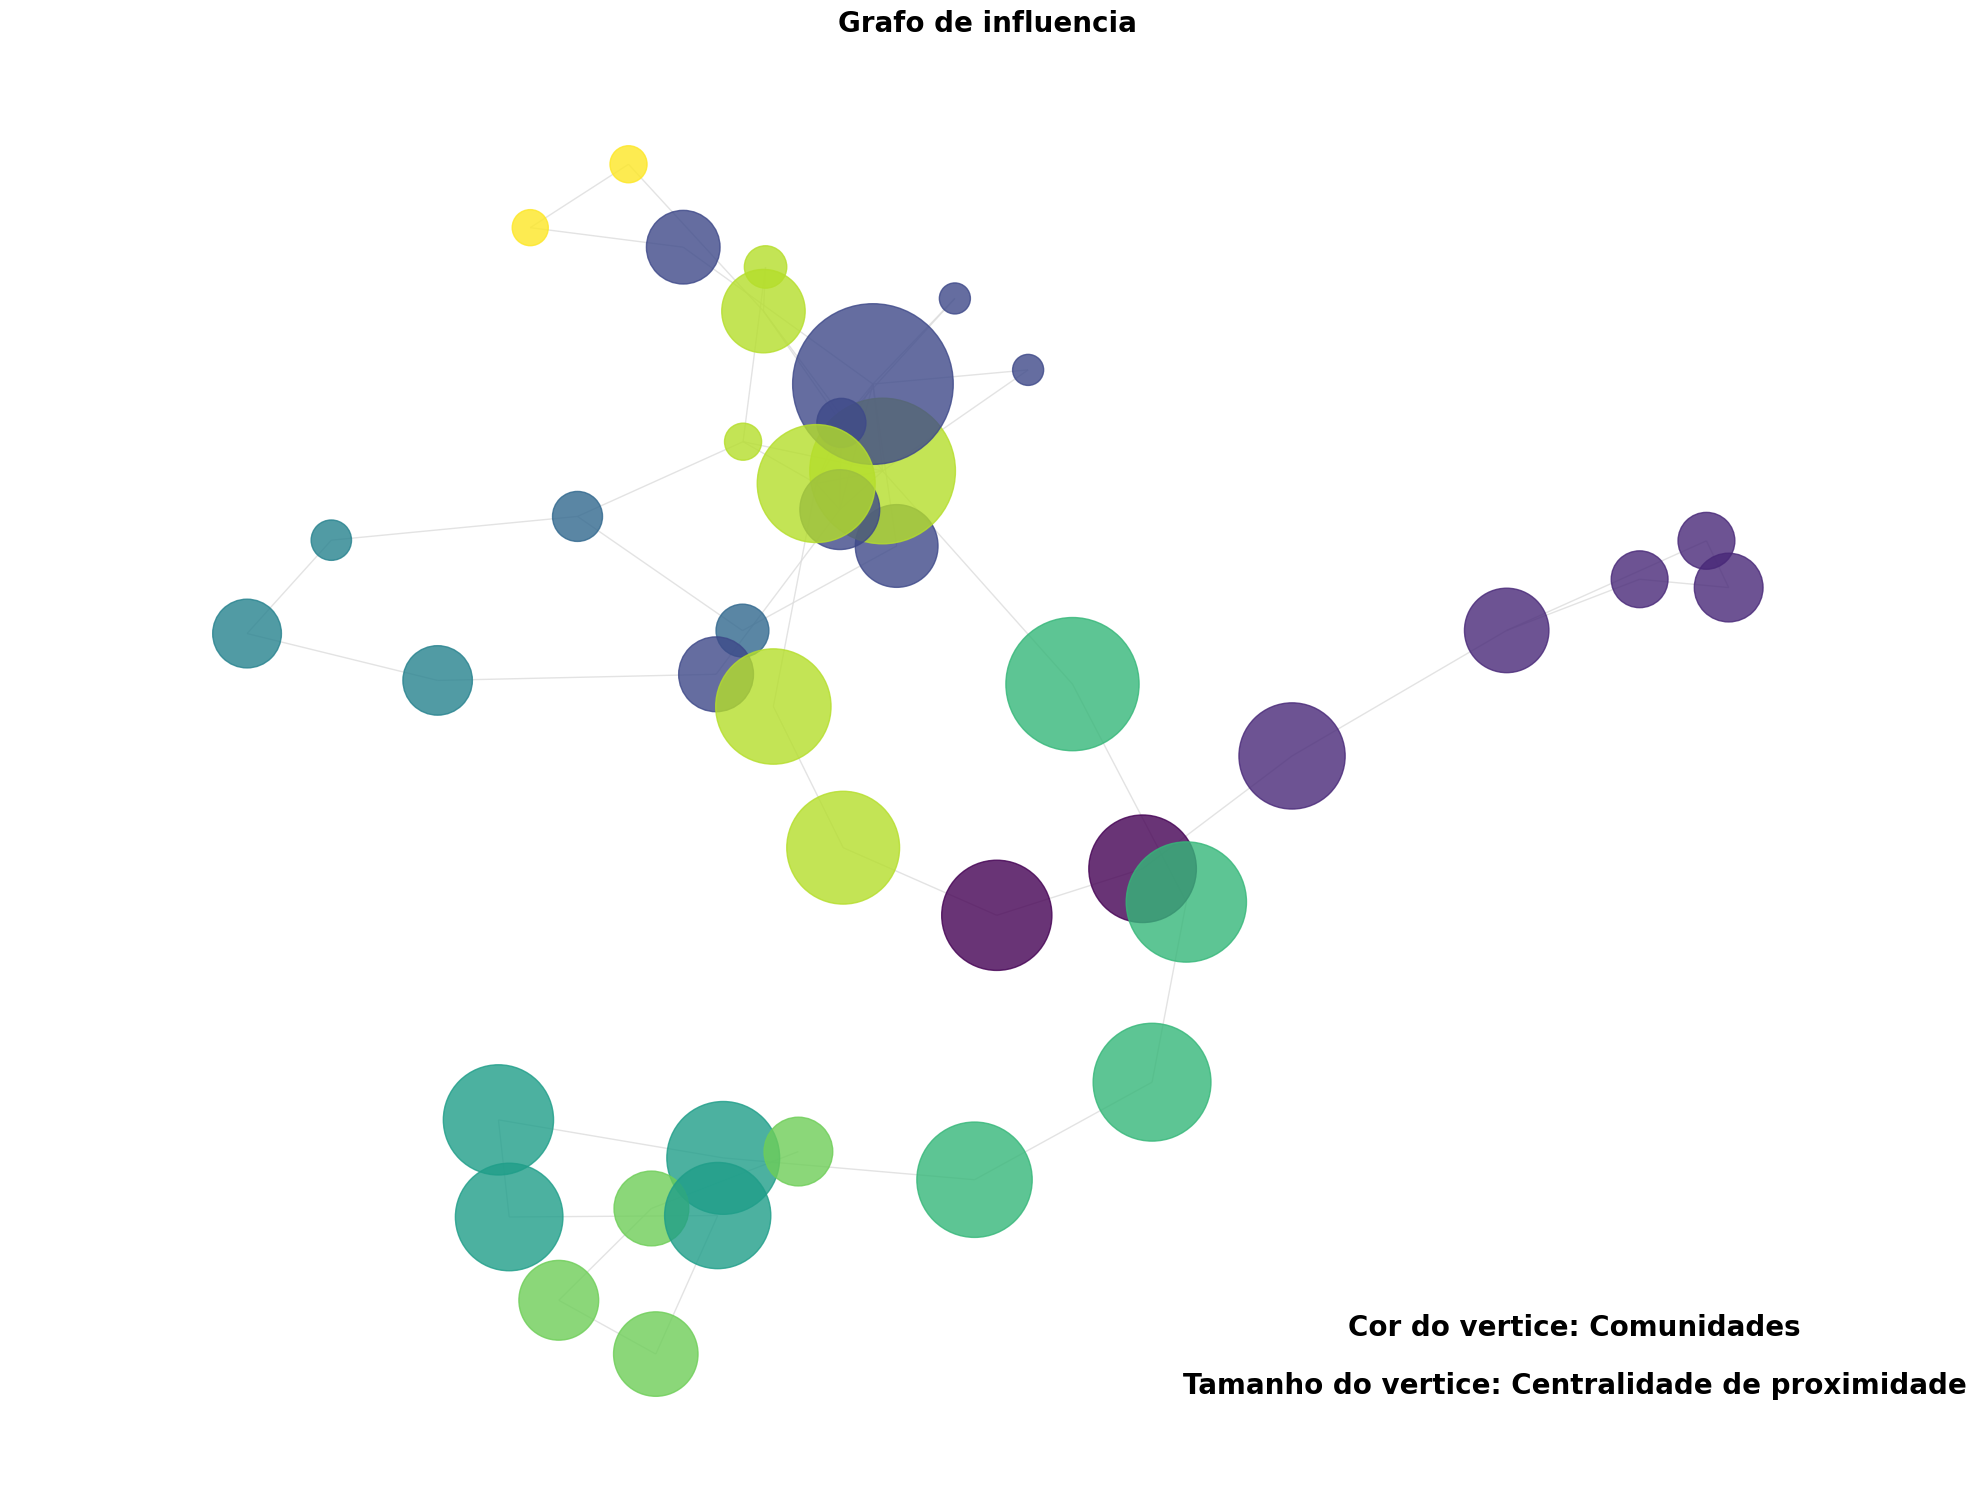

In [21]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

centrality = nx.betweenness_centrality(H, k=10, weight='weight',endpoints=True)
# closeness = nx.closeness_centrality(H, endpoints=True)

lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.8,
)

font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Grafo de influencia", font)
font["color"] = "black"

ax.text(
    0.80,
    0.10,
    "Cor do vertice: Comunidades",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "Tamanho do vertice: Centralidade de proximidade",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

### Análise dos Dados
Através do gráfico de comparação entre os graus de proximidade e intermediação com relação ao peso, é possível observar que um vídeo com conexão mais forte (maior peso) também possui maior número de conexões.

<AxesSubplot:xlabel='closeness_centrality', ylabel='betweenness_centrality'>

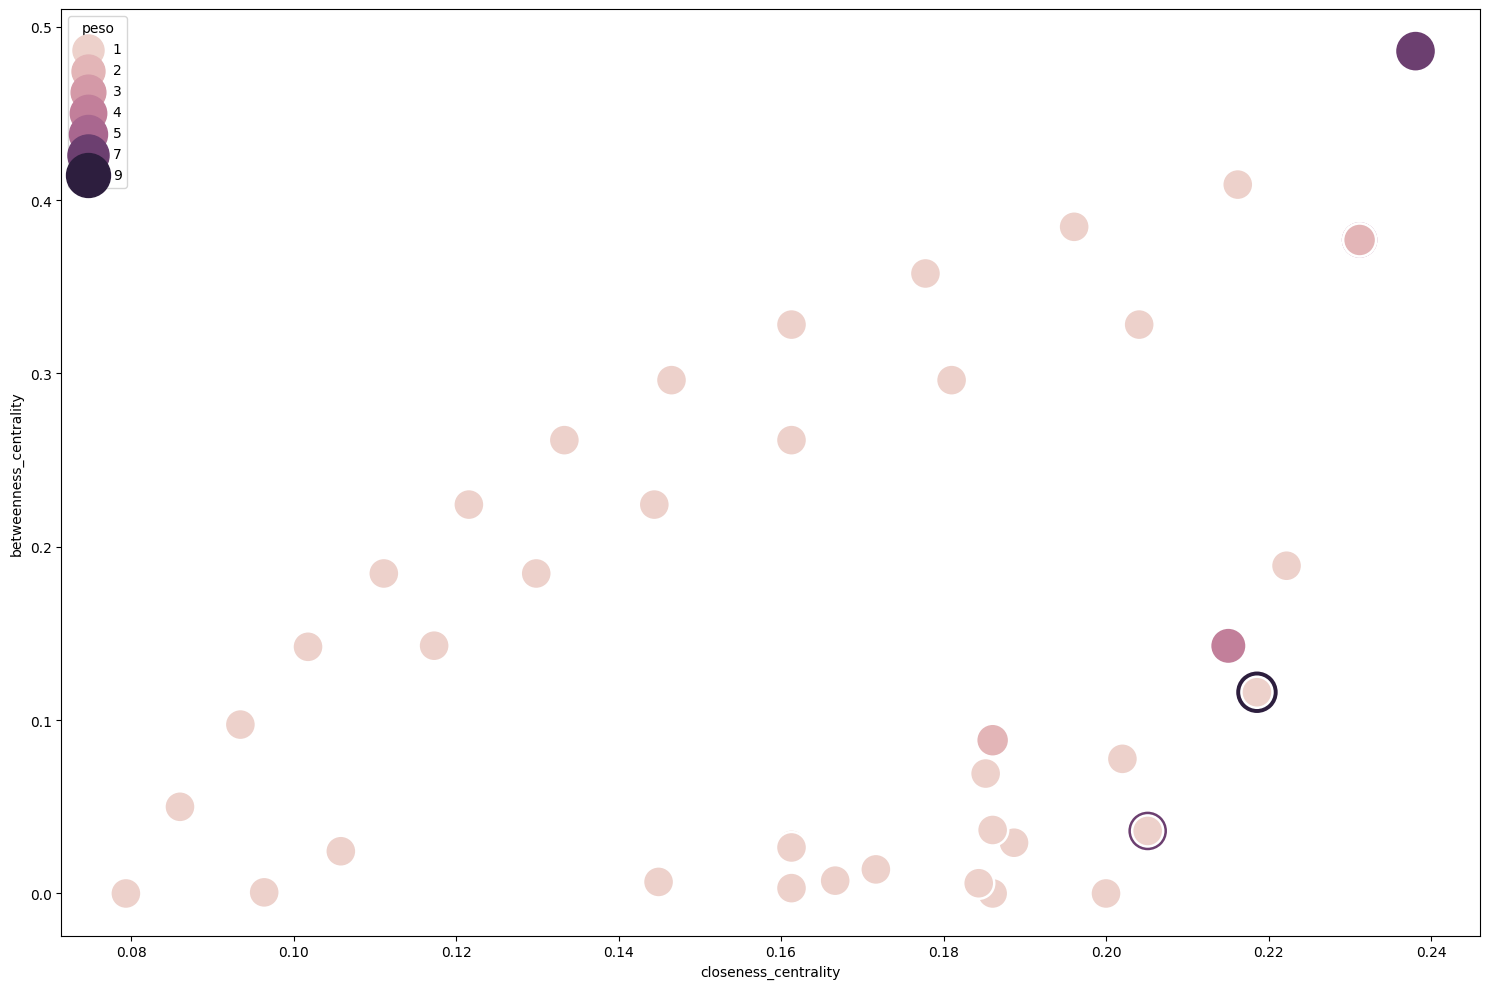

In [25]:
import seaborn as sns
sns.scatterplot(
    data=dfsorted, x="closeness_centrality", y="betweenness_centrality", hue="peso", size="peso",
    sizes=(500, 1000), legend="full"
)

Para analisar os vídeos mais influentes de acordo com o numero de curtidas e visualizações, foi verificado se o peso das arestas aumentava de acordo com os demais dados, porém, foi observado que o numero de curtidas ou visualizações não influencia diretamento no peso.

<AxesSubplot:xlabel='curtidas', ylabel='visualizacoes'>

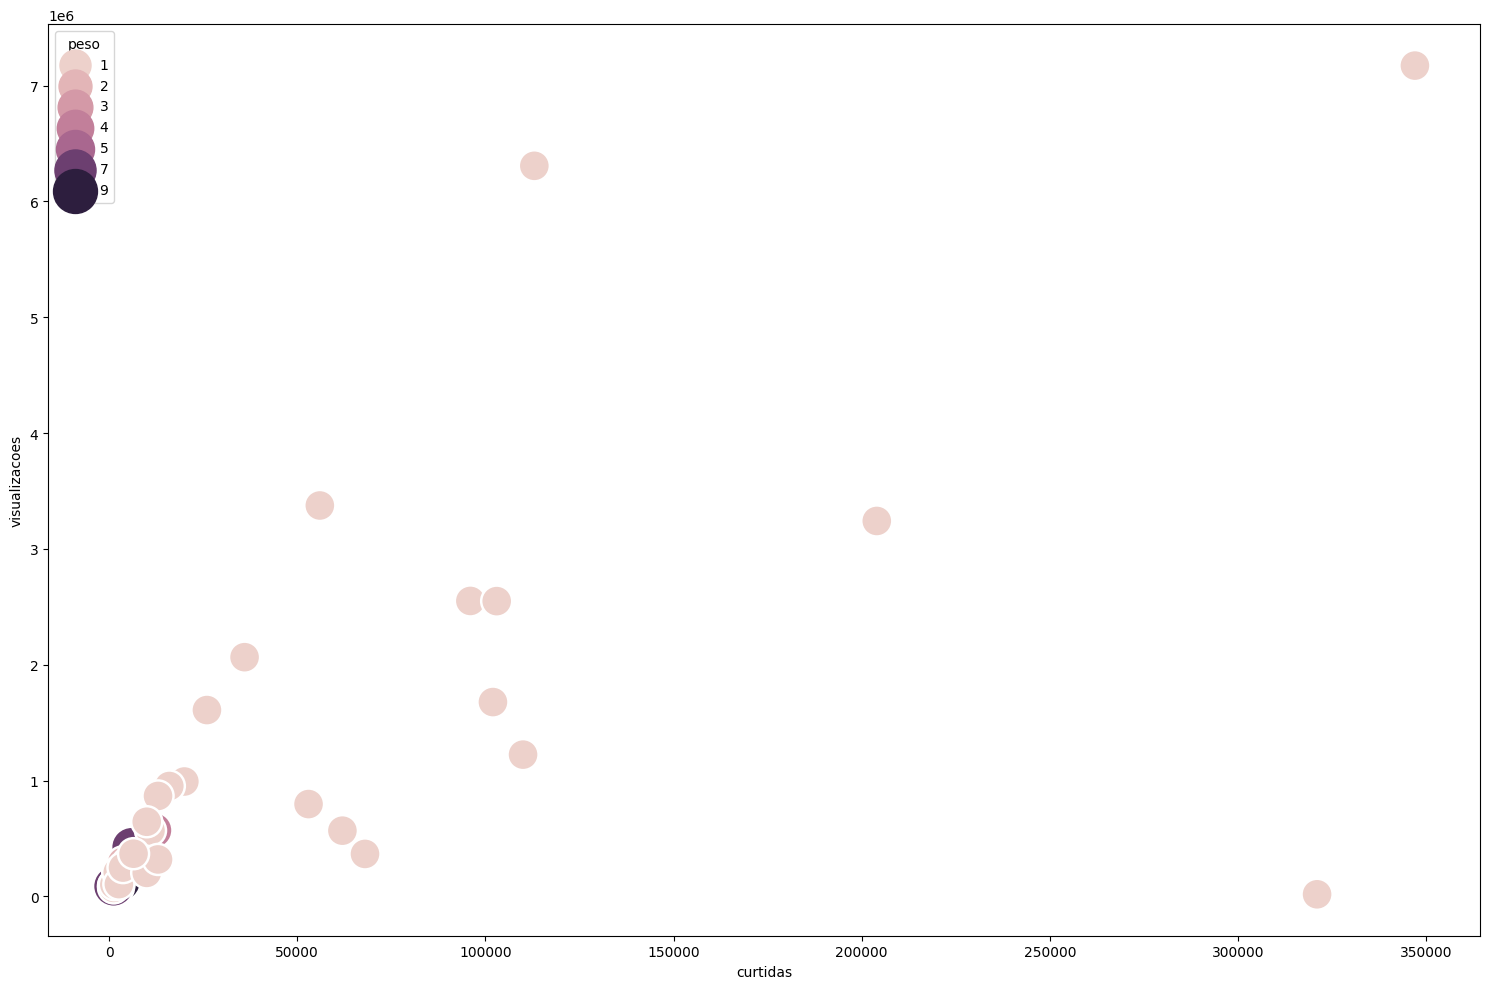

In [26]:
sns.scatterplot(
    data=dfsorted, x="curtidas", y="visualizacoes", hue="peso", size="peso",
    sizes=(500, 1000), legend="full"
)

### Resultados
A fim de descobrir a relação do peso com as demais informações, foi utilizado um boxPlot para visualização da distribuição dos pesos por canais. Através deste gráfico foi possível perceber que a maioria dos canais possui peso 1, e que o único canal com arestas com peso maior, é o g1, indicando que a recomendação de vídeos se baseia em sua maioria no canal.

<AxesSubplot:xlabel='peso', ylabel='canal'>

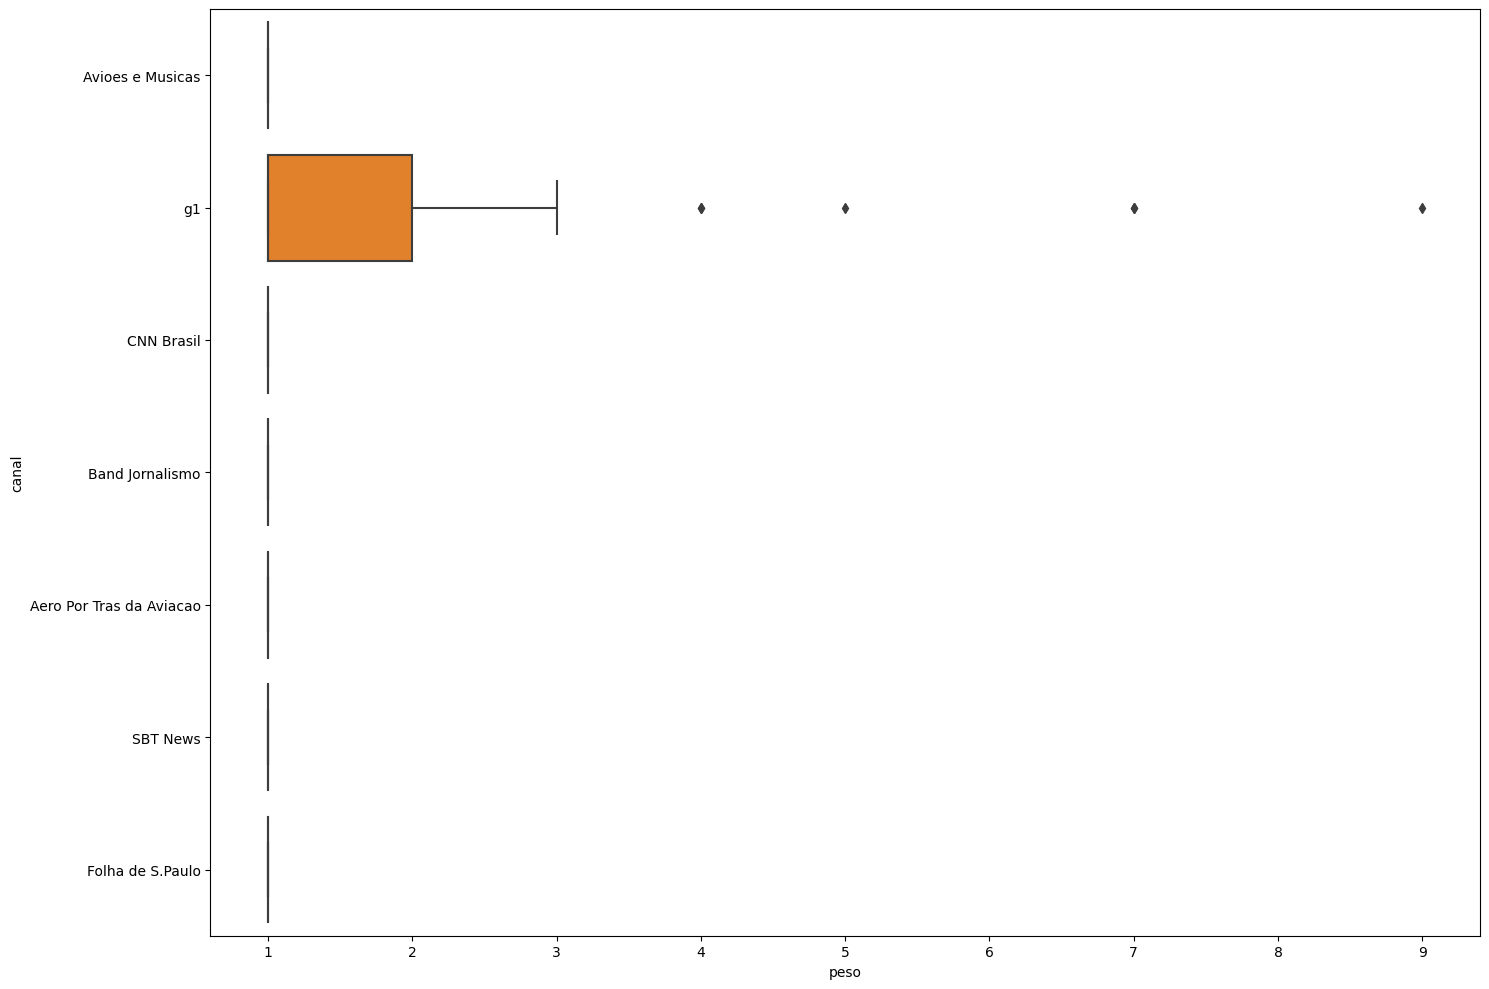

In [28]:
sns.boxplot(data=df, x="peso", y="canal")